<a href="https://colab.research.google.com/github/wigneshh/NLP/blob/main/spam_email_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
df = pd.read_csv("/content/drive/MyDrive/AIML PROJECT/email.csv")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/AIML PROJECT/email.csv'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df = df[df['Category'] != '{"mode":"full"']
print(df['Category'].value_counts())

Category
ham     4825
spam     747
Name: count, dtype: int64


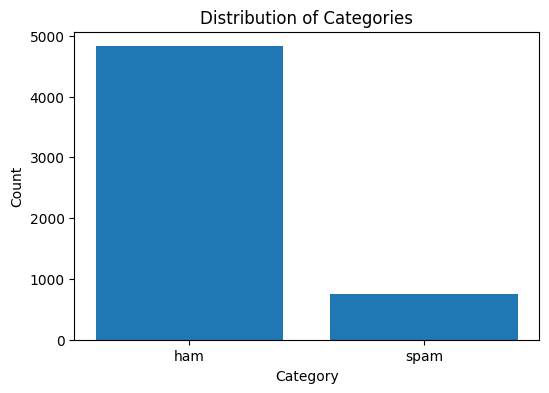

In [ ]:
category_counts = df['Category'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(category_counts.index, category_counts.values)
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

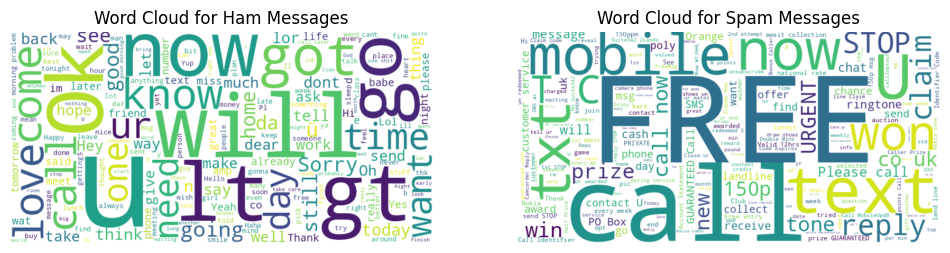

In [ ]:
ham_messages = df[df['Category'] == 'ham']['Message']
spam_messages = df[df['Category'] == 'spam']['Message']

ham_text = ' '.join(ham_messages)
spam_text = ' '.join(spam_messages)

ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis('off')

plt.show()


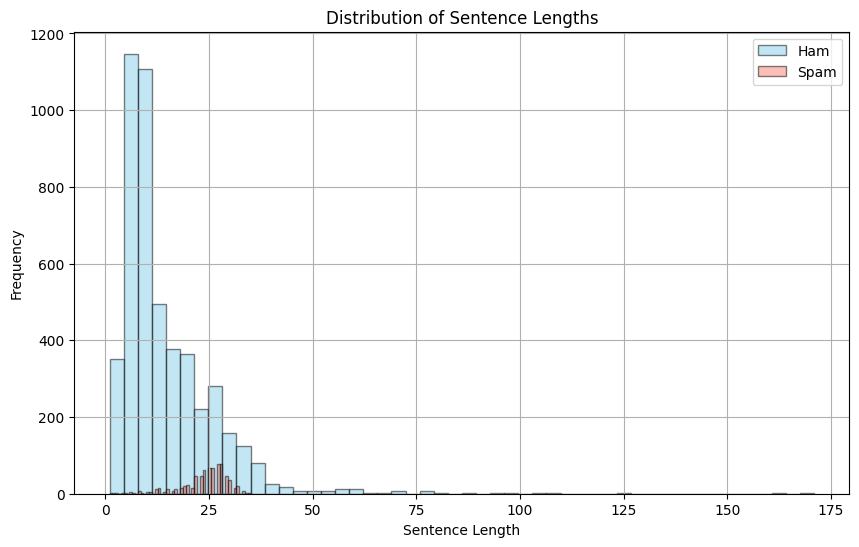

In [ ]:
ham_sentence_lengths = df[df['Category'] == 'ham']['Message'].apply(lambda x: len(x.split()))
spam_sentence_lengths = df[df['Category'] == 'spam']['Message'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
plt.hist(ham_sentence_lengths, bins=50, color='skyblue', edgecolor='black', alpha=0.5, label='Ham')
plt.hist(spam_sentence_lengths, bins=50, color='salmon', edgecolor='black', alpha=0.5, label='Spam')
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_counts, y_train)

y_pred = clf.predict(X_test_counts)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9919282511210762

Classification Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       966
        spam       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115


Confusion Matrix:
[[966   0]
 [  9 140]]


In [ ]:
manual_text =input()
manual_text_vectorized = vectorizer.transform([manual_text])
predicted_class = clf.predict(manual_text_vectorized)[0]
print("Predicted class:", predicted_class)

Subject: You've Been Selected to Receive an Exclusive Offer!  From: "Customer Support" support@superprizes.com  Body:  Hello [Your Name]!  Congratulations! You have been selected to participate in our exclusive reward program, where you could win amazing prizes, including an iPhone 15, a $1000 Amazon gift card, or even a luxury vacation! Don't miss out on this once-in-a-lifetime opportunity!  All you need to do is confirm your details with us and complete a short survey to claim your reward. It only takes a few minutes, and rewards are limited, so act fast!  Click Here to Claim Your Prize Now! [link to suspicious website]  This offer is exclusive and expires in 24 hours, so don’t wait! Secure your reward now and enjoy your amazing prize.  Thank you, The Super Prizes Team
Predicted class: spam
